In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
iris_df['Species'] = iris_df['Species'].map({i: species for i, species in enumerate(iris.target_names)})

In [34]:
print(iris_df.info())
print(iris_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

In [35]:
X = iris_df[iris.feature_names]
y = iris_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=123)

In [38]:
rf_predictions = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Model Accuracy: 0.9333333333333333
Confusion Matrix:
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.75      1.00      0.86         6
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [39]:
importances = rf_model.feature_importances_
features = iris.feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

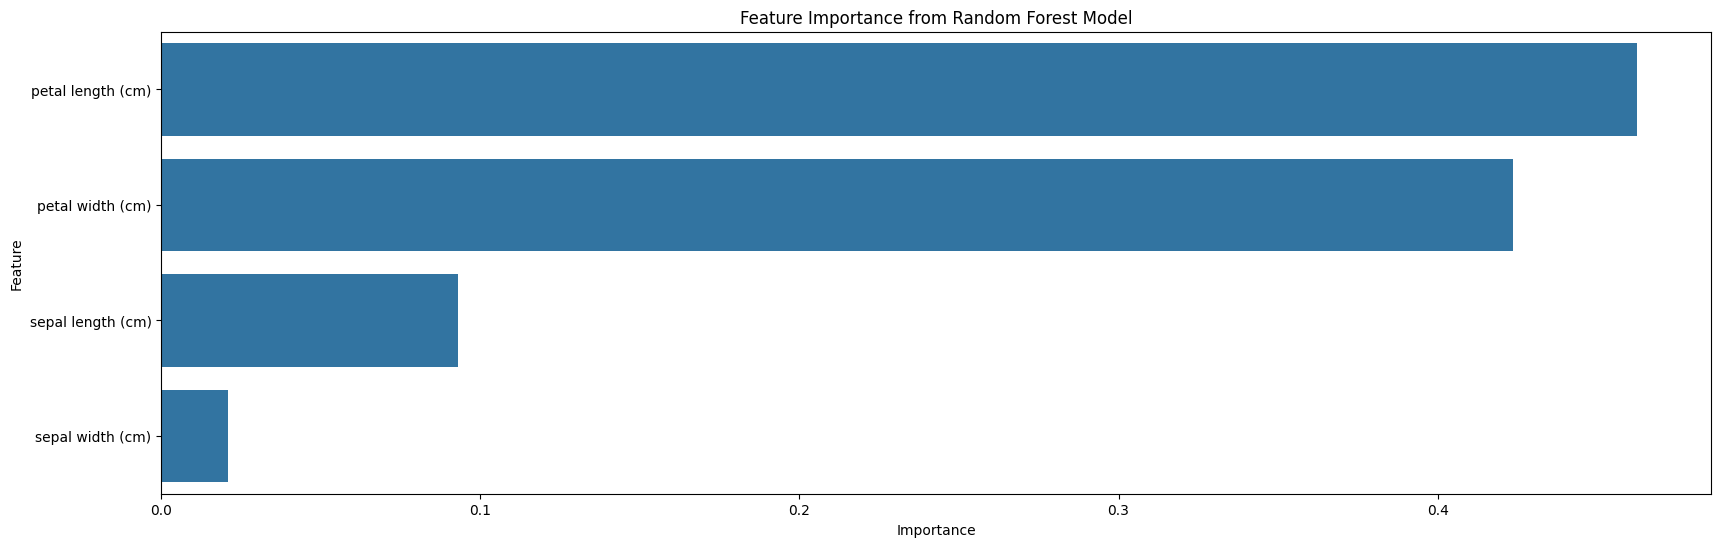

In [41]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.show()


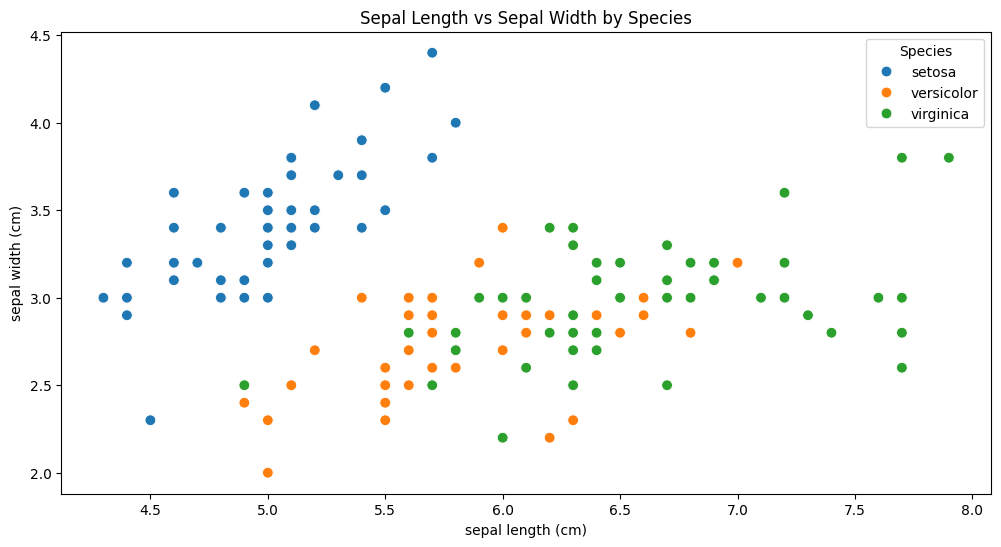

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='Species', s=60)
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()


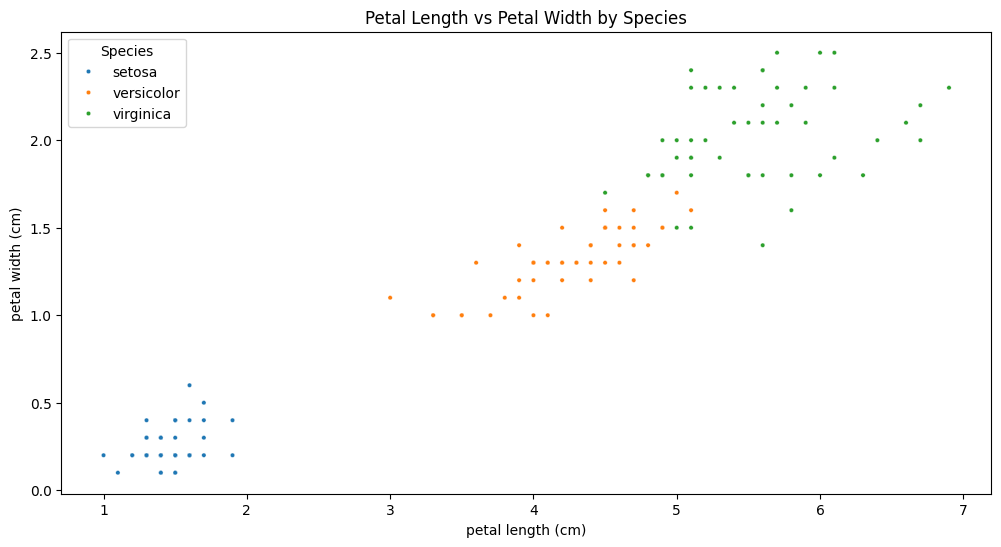

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='Species', s=10)
plt.title('Petal Length vs Petal Width by Species')
plt.show()
